In [20]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.tree import DecisionTreeRegressor

In [2]:
def process_data(caminho_features, caminho_subject, caminho_X, tipo='train'):
    # Carregar features.txt em uma Series
    features_df = pd.read_csv('/content/features.txt', delim_whitespace=True, header=None, usecols=[1])
    features = features_df.squeeze()
    features.name = 'Var'

    # Carregar subject_train.txt ou subject_test.txt em uma Series
    subject_df = pd.read_csv('/content/subject_train.txt', header=None)
    subject = subject_df.squeeze()
    subject.name = 'subject'

    # Carregar X_train.txt ou X_test.txt em um DataFrame
    X = pd.read_csv('/content/X_train.txt', header=None, sep=" ", skipinitialspace=True)

    # Renomear as colunas de X usando os nomes em features
    X.columns = features

    # Adicionar o identificador do sujeito como uma nova coluna no DataFrame
    X = X.assign(individuo=subject)

    # Criar um índice duplo usando a ordem dos dados e o identificador do sujeito
    X = X.set_index([X.index, 'individuo'])
    X.index = X.index.set_names(['indice', 'individuo'])

    # Selecionar apenas as três primeiras colunas de interesse
    X_selected = X[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z']]

    # Salvar os DataFrames em arquivos CSV
    X.to_csv(f"./output/X_{tipo}.csv", index=True)
    X_selected.to_csv(f"./output/X_{tipo}_selected.csv", index=True)

    return X, X_selected

In [3]:
# Caminhos dos arquivos (substitua pelos caminhos corretos)
caminho_features = 'input/features.txt'
caminho_subject_train = 'input/subject_train.txt'
caminho_X_train = 'input/X_train.txt'
caminho_subject_test = 'input/subject_test.txt'
caminho_X_test = 'input/X_test.txt'

In [4]:
# Processar e salvar os dados de treino
X_train, X_train_selected = process_data(caminho_features, caminho_subject_train, caminho_X_train, tipo='train')

<ipython-input-2-21bd63125320>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features_df = pd.read_csv('/content/features.txt', delim_whitespace=True, header=None, usecols=[1])


In [5]:
# Processar e salvar os dados de teste
X_test, X_test_selected = process_data(caminho_features, caminho_subject_test, caminho_X_test, tipo='test')

<ipython-input-2-21bd63125320>:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  features_df = pd.read_csv('/content/features.txt', delim_whitespace=True, header=None, usecols=[1])


In [6]:
# Exibir os DataFrames finais selecionados
X_train_selected.head()

,Var,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z
indice,individuo,,,
0,1,0.288585,-0.020294,-0.132905
1,1,0.278419,-0.016411,-0.123520
2,1,0.279653,-0.019467,-0.113462
3,1,0.279174,-0.026201,-0.123283
4,1,0.276629,-0.016570,-0.115362


In [7]:
# Carregar os dados selecionados (três primeiras colunas + subject)
X_train_selected = pd.read_csv("/content/output/X_train_selected.csv", index_col=[0, 1])
X_test_selected = pd.read_csv("/content/output/X_test_selected.csv", index_col=[0, 1])

In [13]:
# Renomeando a coluna 'antigo_nome' para 'novo_nome'
X_train_selected.rename(columns={'tBodyAcc-mean()-Y': 'subject'}, inplace=True)

print(X_train_selected)

                  tBodyAcc-mean()-X   subject  tBodyAcc-mean()-Z
indice individuo                                                
0      1                   0.288585 -0.020294          -0.132905
1      1                   0.278419 -0.016411          -0.123520
2      1                   0.279653 -0.019467          -0.113462
3      1                   0.279174 -0.026201          -0.123283
4      1                   0.276629 -0.016570          -0.115362
...                             ...       ...                ...
7347   30                  0.299665 -0.057193          -0.181233
7348   30                  0.273853 -0.007749          -0.147468
7349   30                  0.273387 -0.017011          -0.045022
7350   30                  0.289654 -0.018843          -0.158281
7351   30                  0.351503 -0.012423          -0.203867

[7352 rows x 3 columns]


In [15]:
# Atribuir as features e o target
X_train = X_train_selected[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Z']]
y_train = X_train_selected['subject']

In [16]:
y_train.head()

,,subject
indice,individuo,
0,1,-0.020294
1,1,-0.016411
2,1,-0.019467
3,1,-0.026201
4,1,-0.016570


In [17]:
# Renomeando a coluna 'antigo_nome' para 'novo_nome'
X_test_selected.rename(columns={'tBodyAcc-mean()-Y': 'subject'}, inplace=True)

print(X_test_selected)

                  tBodyAcc-mean()-X   subject  tBodyAcc-mean()-Z
indice individuo                                                
0      1                   0.288585 -0.020294          -0.132905
1      1                   0.278419 -0.016411          -0.123520
2      1                   0.279653 -0.019467          -0.113462
3      1                   0.279174 -0.026201          -0.123283
4      1                   0.276629 -0.016570          -0.115362
...                             ...       ...                ...
7347   30                  0.299665 -0.057193          -0.181233
7348   30                  0.273853 -0.007749          -0.147468
7349   30                  0.273387 -0.017011          -0.045022
7350   30                  0.289654 -0.018843          -0.158281
7351   30                  0.351503 -0.012423          -0.203867

[7352 rows x 3 columns]


In [18]:
# Atribuir as features e o target
X_test = X_test_selected[['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Z']]
y_test = X_test_selected['subject']

In [23]:
# Use DecisionTreeRegressor para variáveis ​​de destino contínuas
tree = DecisionTreeRegressor(min_samples_leaf=20, random_state=42)
tree.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=20, random_state=42)

In [24]:
# 2.2 Calcular os ccp_alphas
path = tree.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas = path.ccp_alphas


In [25]:
# Garantir que os valores de ccp_alpha sejam positivos e únicos
ccp_alphas = np.unique(ccp_alphas[ccp_alphas > 0])

In [26]:
# 2.3 Selecionar 1 a cada 5 valores de ccp_alpha
ccp_alphas = ccp_alphas[::5]

In [28]:
# 3.1 Rodar uma árvore para cada ccp_alpha e salvar em uma lista
trees = []
for ccp_alpha in ccp_alphas:
    # Use DecisionTreeRegressor para variáveis de destino contínuas
    tree = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    tree.fit(X_train, y_train)
    trees.append(tree)

In [29]:
# 3.2 Calcular a acurácia de cada árvore na base de treinamento e de teste
train_scores = [tree.score(X_train, y_train) for tree in trees]
test_scores = [tree.score(X_test, y_test) for tree in trees]

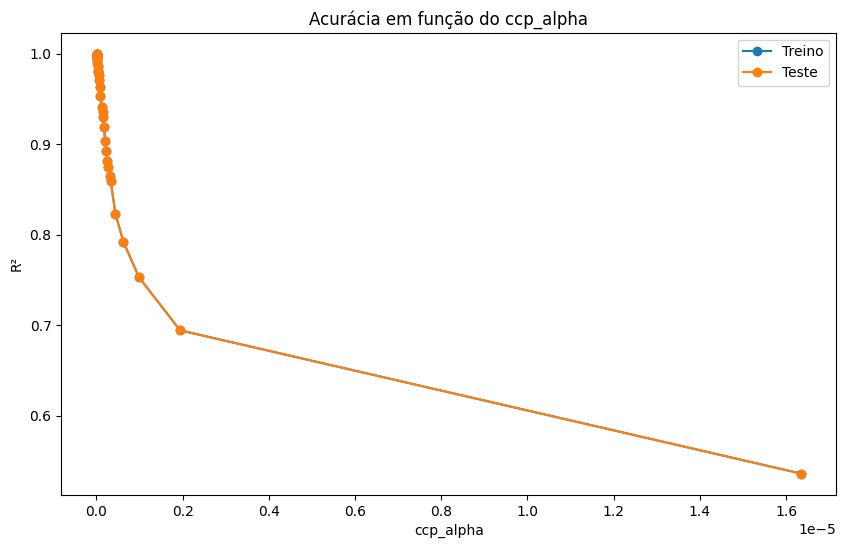

In [30]:
# 3.3 Montar um gráfico da acurácia em função do ccp_alpha na base de validação e na base de teste
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, train_scores, marker='o', label='Treino')
plt.plot(ccp_alphas, test_scores, marker='o', label='Teste')
plt.xlabel('ccp_alpha')
plt.ylabel('R²')
plt.title('Acurácia em função do ccp_alpha')
plt.legend()
plt.show()

In [31]:
# 3.4 Selecionar a melhor árvore com melhor acurácia na base de teste
best_index = np.argmax(test_scores)
best_tree = trees[best_index]

In [32]:
# 3.5 Melhor acurácia na base de teste
best_accuracy = test_scores[best_index]
print(f'Melhor acurácia na base de teste: {best_accuracy:.4f}')

Melhor acurácia na base de teste: 1.0000
